## Tarea 4 - Introspección | Detección de elementos (Islas)
    Ensayo | Solucion de Ángel Arreola
    


Como primera instancia para la resolución de un problema, se necesita saber el planteamiento del mismo. El problema asignado para este miniensayo consiste en la detección de elementos o "islas", las cuales debemos poder identificar usando algún algoritmo que nos permita explorar todo el contenido de una imagen y realizar alguna operación a la misma para poder identificar los objetos que necesitemos o sean de nuestro interés.

Se nos dio la siguiente imagen a trabajar. En ella, se encuentran 6 islas color gris que se deben identificar y apuntar a las coordenadas de su centro para indicarlas en el resultado. Desde este planteamiento, ya podemos destacar varias consideraciones y estrategias a seguir para la resolución del problema.

![Alt text](imagenIslas.png)

Entonces, como punto de partida, el desafío consiste en detectar islas de color gris dentro de una imagen dada y señalar las coordenadas de sus centros. Este problema implica dos tareas principales: la identificación de los objetos (islas) y la determinación de sus centros. Se debe tener en cuenta las limitaciones en términos de tamaño de imagen para optimizar el uso de recursos computacionales, y considerar la presencia de divisiones internas en las islas, lo cual añade complejidad al proceso de detección.

#### Estrategia de Solución
Como primera consideración, debemos ser conscientes de que la imagen que le pasemos a nuestro programa como entrada no debe tener unas dimensiones exageradas, ya que le costará demasiados recursos a nuestro equipo de cómputo el poder procesar tantos datos. También debemos tomar en cuenta que existe una isla en particular la cual tiene divisiones dentro de ella, lo cual es importantísimo a considerar debido a la naturaleza de la solución que se nos pide, la cual es identificar un objeto el cual deberá estar delimitado por algo, ese algo serán sus bordes y el objeto mencionado cumple con la característica de que tiene bordes que dividen su interior, por lo cual debemos desarrollar un algoritmo que se adecúe a esto.

Un primer desarrollo de estrategia para solucionar el problema se dio gracias a lo aprendido en clase, cada píxel cuenta con un color y píxeles vecinos, con esto tomado en cuenta podemos decir que el algoritmo debe seguir con un procedimiento como el siguiente:

- Recorrer todos los píxeles de la imagen.

- Cuando detecte que un píxel cumple con el color buscado, deberá iniciar una búsqueda de Área Conectada o como se vio en clase, detección de isla.

- Una vez que termine el proceso de Área Conectada, procedemos a buscar el centro del objeto, esto usando todas las coordenadas del objeto detectado.

- Se sigue recorriendo toda la imagen siguiendo este proceso hasta que al final solo tenemos como resultado las coordenadas del centro de cada objeto detectado.

#### Primer Intento usando OpenCV y Algoritmo Iterativo para la detección de las islas.

In [2]:
import cv2
import numpy as np

def flood_fill(image, seed_point, replacement_color):
    """
    Realiza la búsqueda en área conectada (flood fill) desde un punto semilla.
    """
    # Obtener las dimensiones de la imagen
    rows, cols = image.shape[:2]
    # Crear una imagen binaria para marcar los píxeles visitados
    visited = np.zeros((rows, cols), dtype=np.uint8)
    # Lista para mantener la cuenta de los píxeles del objeto actual
    object_pixels = []
    # Cola para los píxeles a explorar
    queue = [seed_point]

    # Mientras haya píxeles para explorar en la cola
    while queue:
        # Sacar el próximo píxel de la cola
        x, y = queue.pop(0)
        # Si el píxel ya ha sido visitado o no es del color de reemplazo, continúa
        if visited[y, x] == 1 or not np.array_equal(image[y, x], replacement_color):
            continue

        # Marcar el píxel como visitado
        visited[y, x] = 1
        # Agregar el píxel a la lista de píxeles del objeto
        object_pixels.append((x, y))

        # Agregar píxeles vecinos a la cola si están dentro de los límites de la imagen
        if x > 0: queue.append((x-1, y))  # Izquierda
        if x < cols - 1: queue.append((x+1, y))  # Derecha
        if y > 0: queue.append((x, y-1))  # Arriba
        if y < rows - 1: queue.append((x, y+1))  # Abajo

    return object_pixels

def find_objects(image, target_color):
    # Convertir la imagen a escala de grises
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convertir el color objetivo a escala de grises
    target_grey = cv2.cvtColor(np.uint8([[target_color]]), cv2.COLOR_BGR2GRAY)[0,0]

    rows, cols = grey_image.shape
    object_centers = []

    for y in range(rows):
        for x in range(cols):
            # Si el píxel es del color objetivo, realiza una búsqueda en área conectada
            if grey_image[y, x] == target_grey:
                object_pixels = flood_fill(grey_image, (x, y), target_grey)
                # Si encontramos un objeto, calculamos su centroide
                if object_pixels:
                    object_center = np.mean(object_pixels, axis=0)
                    object_centers.append(object_center)
                    # Opcional: marcar los píxeles del objeto como visitados en la imagen principal
                    for pos in object_pixels:
                        grey_image[pos[1], pos[0]] = 0

    return object_centers

# El color objetivo en BGR
target_color = [102, 102, 102]

# Cargar la imagen
image_path = 'C:\\Users\\angel\\Desktop\\AI\\Tareas\\imagenIslas.png'
image = cv2.imread(image_path)

# Encontrar los objetos
object_centers = find_objects(image, target_color)

# Mostrar los centros de los objetos
for center in object_centers:
    print(f"Centro del objeto: {center}")
    # Dibujar un círculo en el centro del objeto en la imagen
    cv2.circle(image, center=(int(center[0]), int(center[1])), radius=5, color=(0, 255, 0), thickness=-1)

# Mostrar la imagen resultante
cv2.imshow('Objetos Detectados', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Centro del objeto: [41.5 30.5]
Centro del objeto: [69.  30.5]
Centro del objeto: [246.   42.5]
Centro del objeto: [41.5 43. ]
Centro del objeto: [69. 43.]
Centro del objeto: [41.5 55. ]
Centro del objeto: [69. 55.]
Centro del objeto: [ 0. 61.]
Centro del objeto: [287.  129.5]
Centro del objeto: [164.5 136. ]
Centro del objeto: [342.  173.5]
Centro del objeto: [110. 217.]


#### Análisis del Código Desarrollado
El código presentado utiliza la biblioteca OpenCV y NumPy para el procesamiento de imágenes. Se desarrollan dos funciones principales: flood_fill y find_objects.

##### Función flood_fill

Esta función implementa la técnica de Flood Fill para identificar áreas conectadas de un color específico. Se inicia desde un punto semilla y se expande a los píxeles vecinos hasta cubrir toda el área conectada del objeto. Se mantiene un registro de los píxeles visitados para evitar repeticiones.

##### Función find_objects

Esta función convierte la imagen a escala de grises y luego aplica flood_fill a cada píxel que coincida con el color objetivo. Al finalizar, calcula y devuelve los centros de los objetos detectados.

#### Retroalimentacion del primer algoritmo desarrollado
El codigo anterior funciono pero tiene algunas complicaciones al momento de detectar los objetos ya que se paso por alto la consideracion de los bordes dentro de los objetos, como se muestra en la siguiente imagen, se puede observar que la primera isla a la izquiera superior no esta siendo identificada de manera correcta debido a las divisiones que tiene dentro de esta.

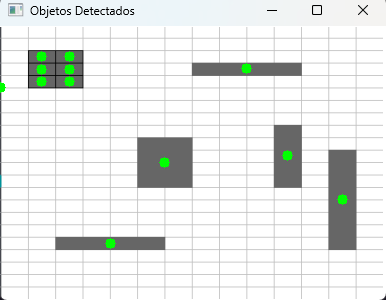

Se identificó un problema con la detección de islas que presentan divisiones internas. Para resolverlo, se introdujo una función adicional is_valid, que permite "saltar" sobre píxeles no objetivo si están rodeados por píxeles del color buscado. Esta mejora permite una detección más precisa de objetos con características internas complejas.


In [3]:
import cv2
import numpy as np

def is_valid(image, x, y, target_grey, visited):
    rows, cols = image.shape[:2]
    if x < 0 or x >= cols or y < 0 or y >= rows:
        return False
    if visited[y, x]:
        return False
    # Comprobar si el píxel actual es del color objetivo o si está rodeado de píxeles del color objetivo
    if image[y, x] == target_grey:
        return True
    # Permitir "saltar" sobre píxeles oscuros si están rodeados por el color objetivo
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < cols and 0 <= ny < rows and image[ny, nx] == target_grey:
            return True
    return False

def flood_fill(image, seed_point, target_grey, visited):
    rows, cols = image.shape[:2]
    object_pixels = []
    queue = [seed_point]

    while queue:
        x, y = queue.pop(0)
        if not is_valid(image, x, y, target_grey, visited):
            continue

        visited[y, x] = True
        object_pixels.append((x, y))

        # Agregar vecinos a la cola
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if is_valid(image, nx, ny, target_grey, visited):
                queue.append((nx, ny))

    return object_pixels

def find_objects(image, target_color):
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    target_grey = cv2.cvtColor(np.uint8([[target_color]]), cv2.COLOR_BGR2GRAY)[0][0]

    rows, cols = grey_image.shape
    visited = np.zeros((rows, cols), dtype=bool)
    object_centers = []

    for y in range(rows):
        for x in range(cols):
            if grey_image[y, x] == target_grey and not visited[y, x]:
                object_pixels = flood_fill(grey_image, (x, y), target_grey, visited)
                if object_pixels:
                    object_center = np.mean(object_pixels, axis=0)
                    object_centers.append(object_center)

    return object_centers

# El color objetivo en BGR
target_color = [102, 102, 102]

# Cargar la imagen
image_path = 'C:\\Users\\angel\\Desktop\\AI\\Tareas\\imagenIslas.png'
image = cv2.imread(image_path)

# Encontrar los objetos
object_centers = find_objects(image, target_color)

# Mostrar los centros de los objetos
for center in object_centers:
    print(f"Centro del objeto: {center}")
    cv2.circle(image, center=(int(center[0]), int(center[1])), radius=5, color=(0, 255, 0), thickness=-1)

# Guardar y mostrar la imagen resultante
output_image_path = 'C:\\Users\\angel\\Desktop\\AI\\Tareas\\detected_objects.png'
cv2.imwrite(output_image_path, image)

# Mostrar la imagen resultante
cv2.imshow('Objetos Detectados', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Centro del objeto: [54.99751861 43.01389578]
Centro del objeto: [246.   42.5]
Centro del objeto: [ 0.25 61.  ]
Centro del objeto: [287.  129.5]
Centro del objeto: [164.5 136. ]
Centro del objeto: [342.  173.5]
Centro del objeto: [110. 217.]


#### Resultado obtenido

Como resultado del programa desarrollado, ahora si que pudimos detectar los objetos de manera adecuada, imprimiendo el valor de las coordenadas de su centro y aprendiendo el como funcionan este tipo de algoritmos.


![image.png](detected_objects%20copy.png)

Con las mejoras implementadas, el algoritmo es capaz de identificar correctamente todas las islas en la imagen, incluyendo aquellas con divisiones internas. Este ejercicio demuestra la importancia de un enfoque adaptable y reflexivo en la solución de problemas de visión por computadora, especialmente en situaciones donde los objetos a detectar presentan características internas variables. El aprendizaje obtenido de este ejercicio enfatiza la necesidad de una comprensión profunda de las características de la imagen y de los algoritmos involucrados en su procesamiento.

#### Implementacion de la version recursiva

##### Enfoque Recursivo en la Detección de Objetos en Imágenes

El código emplea un enfoque recursivo para identificar objetos en una imagen, basándose en la técnica de Flood Fill. Este método se centra en expandirse desde un píxel inicial, o semilla, a sus píxeles vecinos, agrupando aquellos que cumplen con un criterio específico, como tener el mismo color.

##### Funcionamiento del Flood Fill Recursivo

1. **Inicio desde un Píxel Semilla:**
La función 'flood_fill_recursive' comienza en un píxel semilla, verificando si este debe ser parte del objeto mediante la función 'is_valid'.

2. **Expansión y Llamadas Recursivas:**
Si el píxel es válido, la función se llama a sí misma para cada píxel vecino. Este proceso continúa, agregando píxeles que forman parte del objeto a la lista 'object_pixels'.

3. **Terminación de la Recursión:**
La recursión termina cuando se encuentran píxeles que no cumplen el criterio o ya han sido visitados, evitando repeticiones innecesarias.

##### Consideraciones del Enfoque Recursivo

- **Limitaciones de Profundidad:**
Python tiene un límite en la profundidad de las llamadas recursivas, lo que puede ser problemático para imágenes grandes.
  
- **Eficiencia:**
Aunque la recursividad ofrece claridad, puede ser menos eficiente en términos de rendimiento y uso de memoria que los métodos iterativos.

##### Conclusión
El uso de la recursividad en la detección de objetos en imágenes, a través de una adaptación del Flood Fill, muestra cómo se pueden aplicar conceptos fundamentales de la ciencia de la computación en el procesamiento de imágenes. A pesar de sus desafíos prácticos, este enfoque destaca por su claridad y simplicidad, ofreciendo una perspectiva única en el tratamiento de imágenes digitales.

In [1]:
import cv2
import numpy as np

def is_valid(image, x, y, target_grey, visited):
    rows, cols = image.shape[:2]
    if x < 0 or x >= cols or y < 0 or y >= rows:
        return False
    if visited[y, x]:
        return False
    if image[y, x] == target_grey:
        return True
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < cols and 0 <= ny < rows and image[ny, nx] == target_grey:
            return True
    return False

def flood_fill_recursive(image, x, y, target_grey, visited, object_pixels):
    if not is_valid(image, x, y, target_grey, visited):
        return
    visited[y, x] = True
    object_pixels.append((x, y))
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        flood_fill_recursive(image, nx, ny, target_grey, visited, object_pixels)

def find_objects(image, target_color):
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    target_grey = cv2.cvtColor(np.uint8([[target_color]]), cv2.COLOR_BGR2GRAY)[0][0]

    rows, cols = grey_image.shape
    visited = np.zeros((rows, cols), dtype=bool)
    object_centers = []

    for y in range(rows):
        for x in range(cols):
            if grey_image[y, x] == target_grey and not visited[y, x]:
                object_pixels = []
                flood_fill_recursive(grey_image, x, y, target_grey, visited, object_pixels)
                if object_pixels:
                    object_center = np.mean(object_pixels, axis=0)
                    object_centers.append(object_center)

    return object_centers

# El color objetivo en BGR
target_color = [102, 102, 102]

# Cargar la imagen
image_path = 'C:\\Users\\angel\\Desktop\\AI\\Tareas\\imagenIslas.png'
image = cv2.imread(image_path)

# Encontrar los objetos
object_centers = find_objects(image, target_color)

# Mostrar los centros de los objetos
for center in object_centers:
    print(f"Centro del objeto: {center}")
    cv2.circle(image, center=(int(center[0]), int(center[1])), radius=5, color=(0, 255, 0), thickness=-1)

# Guardar y mostrar la imagen resultante
output_image_path = 'C:\\Users\\angel\\Desktop\\AI\\Tareas\\detected_objects_recursiveVersion.png'
cv2.imwrite(output_image_path, image)

# Mostrar la imagen resultante
cv2.imshow('Objetos Detectados', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Centro del objeto: [54.99751861 43.01389578]
Centro del objeto: [246.   42.5]
Centro del objeto: [ 0.25 61.  ]
Centro del objeto: [287.  129.5]
Centro del objeto: [164.5 136. ]
Centro del objeto: [342.  173.5]
Centro del objeto: [110. 217.]
